In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import scipy.stats as ss
import numpy as np
from category_encoders.ordinal import OrdinalEncoder
from category_encoders.one_hot import OneHotEncoder
from category_encoders.binary import BinaryEncoder
from sklearn.model_selection import train_test_split

pd.options.display.max_rows = 35
pd.options.display.max_columns = 35

df = pd.read_csv("carclaims.csv")
df.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,PolicyNumber,RepNumber,Deductible,DriverRating,Days:Policy-Accident,Days:Policy-Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange-Claim,NumberOfCars,Year,BasePolicy,FraudFound
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,21,Policy Holder,Sport - Liability,Sport,"more than 69,000",1,12,300,1,more than 30,more than 30,none,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability,No
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,34,Policy Holder,Sport - Collision,Sport,"more than 69,000",2,15,400,4,more than 30,more than 30,none,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision,No
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,47,Policy Holder,Sport - Collision,Sport,"more than 69,000",3,7,400,3,more than 30,more than 30,1,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision,No
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,65,Third Party,Sedan - Liability,Sport,"20,000 to 29,000",4,4,400,2,more than 30,more than 30,1,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability,No
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,27,Third Party,Sport - Collision,Sport,"more than 69,000",5,3,400,1,more than 30,more than 30,none,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision,No


# EDA

### Dataset Summary

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  object
 14  VehiclePrice          15420 non-null  object
 15  PolicyNumber          15420 non-null

### Feature dimensions

In [31]:
df.nunique()

Month                      12
WeekOfMonth                 5
DayOfWeek                   7
Make                       19
AccidentArea                2
DayOfWeekClaimed            8
MonthClaimed               13
WeekOfMonthClaimed          5
Sex                         2
MaritalStatus               4
Age                        66
Fault                       2
PolicyType                  9
VehicleCategory             3
VehiclePrice                6
PolicyNumber            15420
RepNumber                  16
Deductible                  4
DriverRating                4
Days:Policy-Accident        5
Days:Policy-Claim           4
PastNumberOfClaims          4
AgeOfVehicle                8
AgeOfPolicyHolder           9
PoliceReportFiled           2
WitnessPresent              2
AgentType                   2
NumberOfSuppliments         4
AddressChange-Claim         5
NumberOfCars                5
Year                        3
BasePolicy                  3
FraudFound                  2
dtype: int

### Checking for missing values

In [32]:
df.isnull().sum()

Month                   0
WeekOfMonth             0
DayOfWeek               0
Make                    0
AccidentArea            0
DayOfWeekClaimed        0
MonthClaimed            0
WeekOfMonthClaimed      0
Sex                     0
MaritalStatus           0
Age                     0
Fault                   0
PolicyType              0
VehicleCategory         0
VehiclePrice            0
PolicyNumber            0
RepNumber               0
Deductible              0
DriverRating            0
Days:Policy-Accident    0
Days:Policy-Claim       0
PastNumberOfClaims      0
AgeOfVehicle            0
AgeOfPolicyHolder       0
PoliceReportFiled       0
WitnessPresent          0
AgentType               0
NumberOfSuppliments     0
AddressChange-Claim     0
NumberOfCars            0
Year                    0
BasePolicy              0
FraudFound              0
dtype: int64

##### Based on the statistics above, there are no missing values in the dataset

### Fraud Ratio

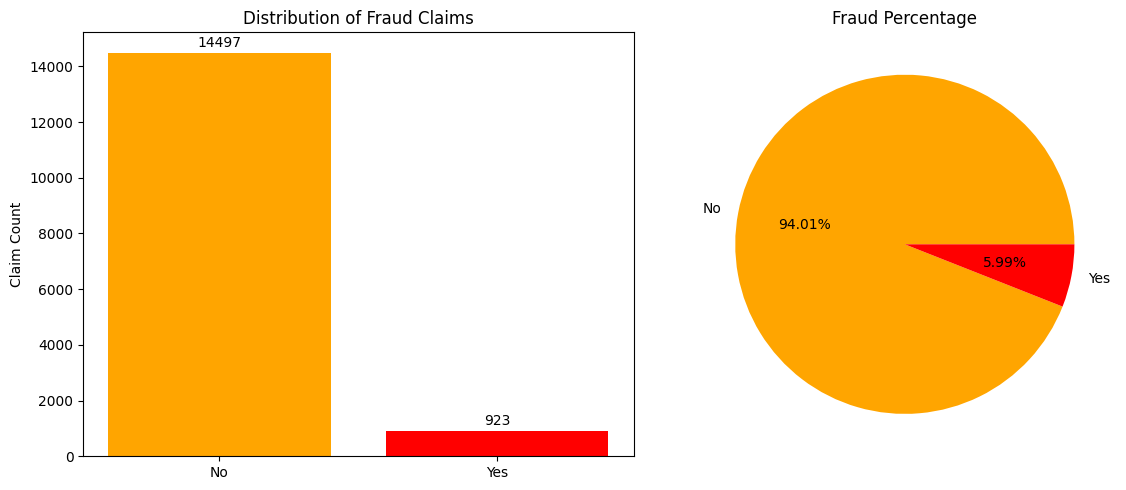

In [33]:

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

fraud_counts = df["FraudFound"].value_counts()
ax[0].bar(fraud_counts.index, fraud_counts.values, color=["orange", "red"])
ax[0].set_ylabel("Claim Count")
ax[0].set_title("Distribution of Fraud Claims")

# Annotate the bar heights with their counts
for p in ax[0].patches:
    ax[0].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height() + 100), ha='center', va='bottom', fontsize=10, color='black')

# Plot the pie chart for the percentage of fraud and no fraud
fraud_percentage = df["FraudFound"].value_counts(normalize=True)
ax[1].pie(fraud_percentage, labels=fraud_percentage.index, autopct='%.2f%%', colors=["orange", "red"])
ax[1].set_title("Fraud Percentage")

plt.tight_layout()
plt.show()


In [34]:
ratio_of_fraud_vs_nonfraud = len(df[df['FraudFound'] == 'Yes']) / len(df[df['FraudFound'] == 'No'])
ratio_of_fraud_vs_nonfraud

0.06366834517486376

The ratio of fraud vs non-fraud transactions is 0.06366834517486376.

### Check duplicate rows

In [35]:
df.duplicated().sum()

0

##### There are no duplcated rows in the dataset

In [36]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
WeekOfMonth,15420.0,2.788586,1.287585,1.0,2.00,3.0,4.00,5.0
WeekOfMonthClaimed,15420.0,2.693969,1.259115,1.0,2.00,3.0,4.00,5.0
Age,15420.0,39.855707,13.492377,0.0,31.00,38.0,48.00,80.0
PolicyNumber,15420.0,7710.500000,4451.514911,1.0,3855.75,7710.5,11565.25,15420.0
RepNumber,15420.0,8.483268,4.599948,1.0,5.00,8.0,12.00,16.0
Deductible,15420.0,407.704280,43.950998,300.0,400.00,400.0,400.00,700.0
DriverRating,15420.0,2.487808,1.119453,1.0,1.00,2.0,3.00,4.0
Year,15420.0,1994.866472,0.803313,1994.0,1994.00,1995.0,1996.00,1996.0


### Distribution Plots

array([[<Axes: title={'center': 'WeekOfMonth'}>,
        <Axes: title={'center': 'WeekOfMonthClaimed'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'PolicyNumber'}>],
       [<Axes: title={'center': 'RepNumber'}>,
        <Axes: title={'center': 'Deductible'}>,
        <Axes: title={'center': 'DriverRating'}>,
        <Axes: title={'center': 'Year'}>]], dtype=object)

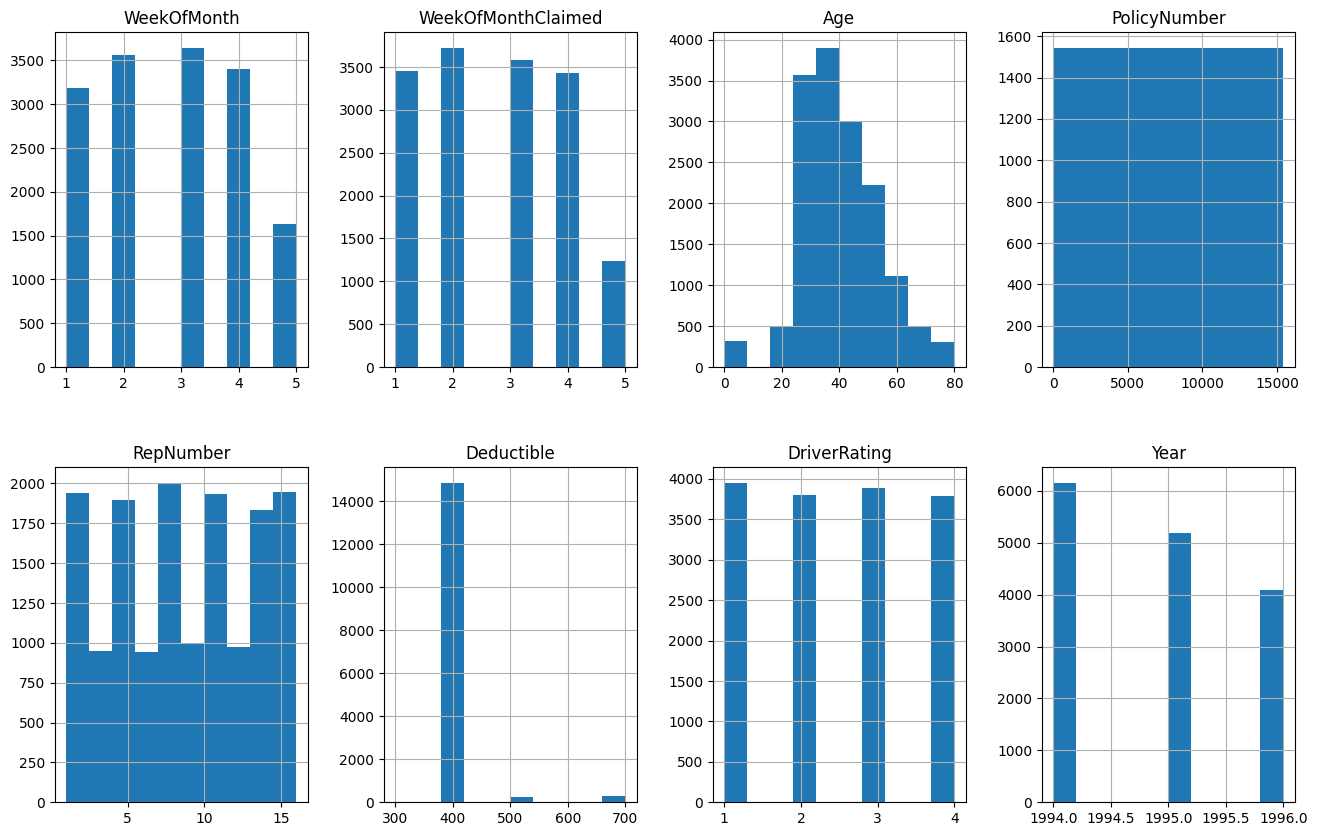

In [37]:
fig, axis = plt.subplots(2, 4, figsize=(16, 10))
df.hist(ax = axis)

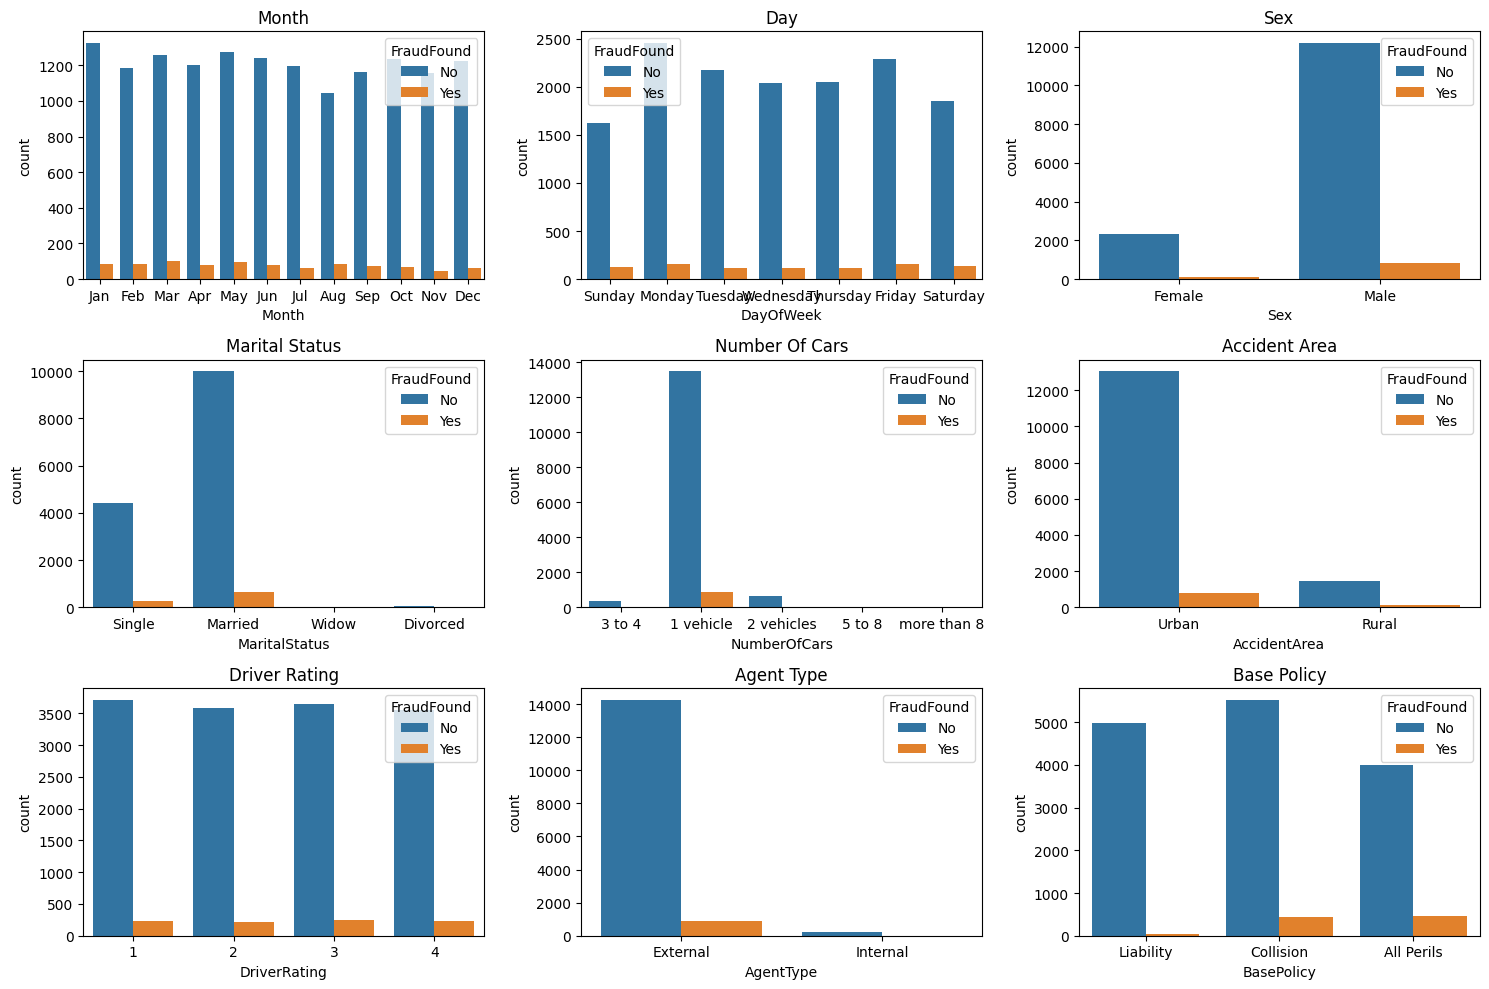

In [38]:
fig, ax = plt.subplots(3,3, figsize=(15,10))
sns.countplot(data=df, x='Month', hue='FraudFound', order=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'], ax=ax[0][0])
ax[0][0].set_title('Month')

sns.countplot(data=df, x='DayOfWeek', hue='FraudFound', order=['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'], ax=ax[0][1])
ax[0][1].set_title('Day')

sns.countplot(data=df, x='Sex', hue='FraudFound', ax=ax[0][2])
ax[0][2].set_title('Sex')

sns.countplot(data=df, x='MaritalStatus', hue='FraudFound', ax=ax[1][0])
ax[1][0].set_title('Marital Status')

sns.countplot(data=df, x='NumberOfCars', hue='FraudFound', ax=ax[1][1])
ax[1][1].set_title('Number Of Cars')

sns.countplot(data=df, x='AccidentArea', hue='FraudFound', ax=ax[1][2])
ax[1][2].set_title('Accident Area')

sns.countplot(data=df, x='DriverRating', hue='FraudFound', ax=ax[2][0])
ax[2][0].set_title('Driver Rating')

sns.countplot(data=df, x='AgentType', hue='FraudFound', ax=ax[2][1])
ax[2][1].set_title('Agent Type')

sns.countplot(data=df, x='BasePolicy', hue='FraudFound', ax=ax[2][2])
ax[2][2].set_title('Base Policy')


plt.tight_layout()

##### Converting Yes and No values of "FraudFound" to 1 and 0 respectively

In [39]:
df["FraudFound"] = df["FraudFound"].replace('No', 0)
df["FraudFound"] = df["FraudFound"].replace('Yes', 1)


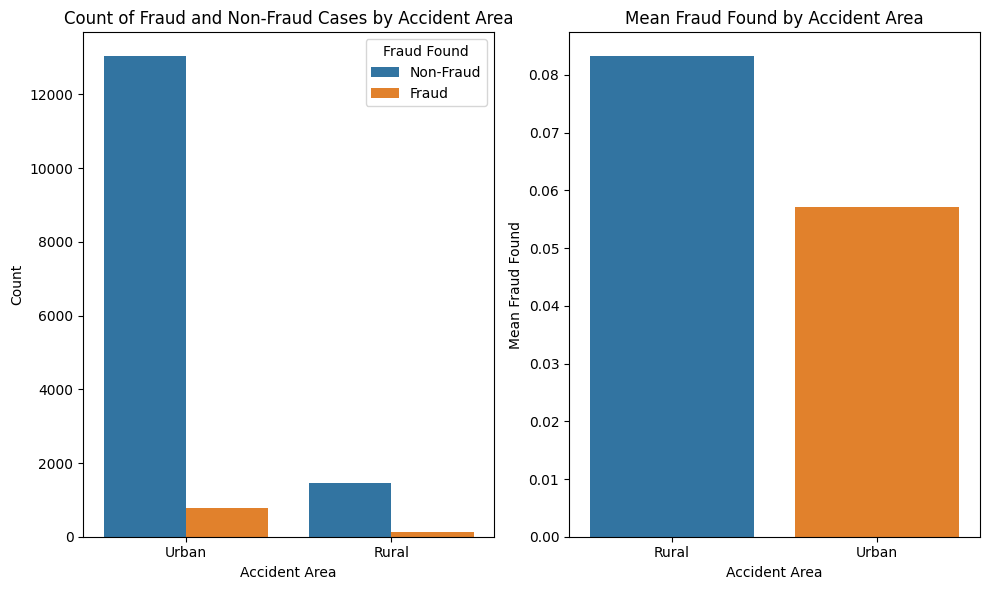

In [40]:
fig, ax = plt.subplots(1, 2, figsize=(10, 6))


sns.countplot(x='AccidentArea', hue='FraudFound', data=df, ax=ax[0])
ax[0].set_title('Count of Fraud and Non-Fraud Cases by Accident Area')
ax[0].set_xlabel('Accident Area')
ax[0].set_ylabel('Count')
ax[0].legend(title='Fraud Found', labels=['Non-Fraud', 'Fraud'])


area_fraud = df.groupby('AccidentArea')['FraudFound'].mean()
sns.barplot(x=area_fraud.index, y=area_fraud.values, ax=ax[1])
ax[1].set_title('Mean Fraud Found by Accident Area')
ax[1].set_xlabel('Accident Area')
ax[1].set_ylabel('Mean Fraud Found')



plt.tight_layout()



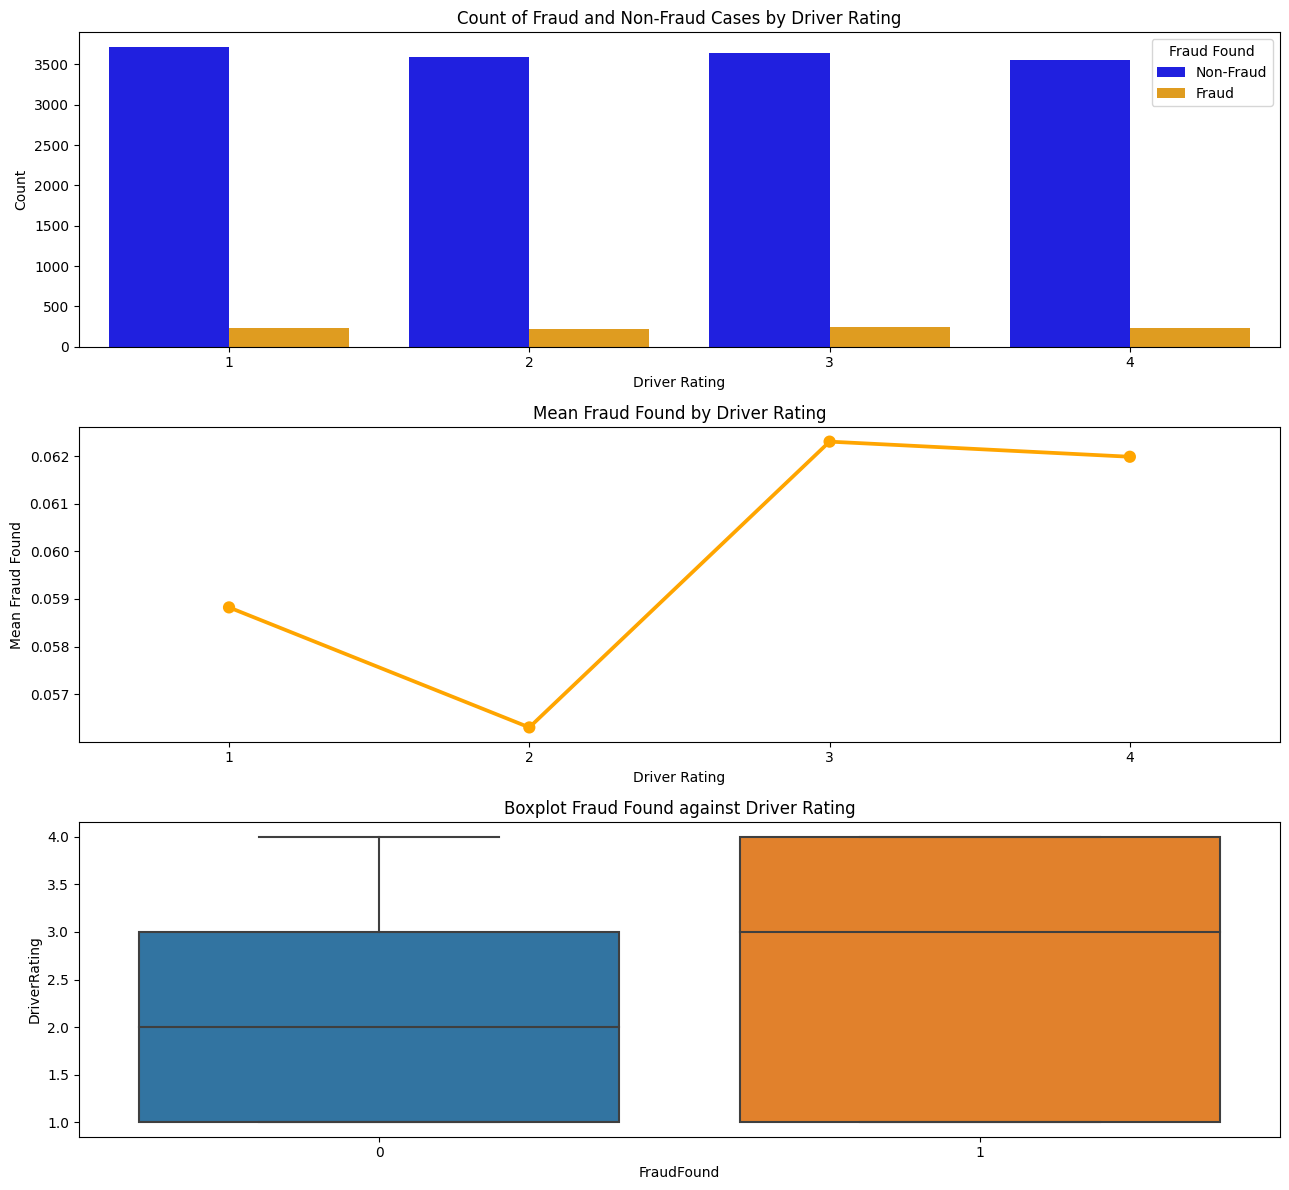

In [41]:
fig, ax = plt.subplots(3, 1, figsize=(13, 12))

sns.countplot(x='DriverRating', hue='FraudFound', data=df, ax=ax[0], palette=["blue","orange"])
ax[0].set_title('Count of Fraud and Non-Fraud Cases by Driver Rating')
ax[0].set_xlabel('Driver Rating')
ax[0].set_ylabel('Count')
ax[0].legend(title='Fraud Found', labels=['Non-Fraud', 'Fraud'])

rating_fraud = df.groupby('DriverRating')['FraudFound'].mean()
sns.pointplot(x=rating_fraud.index, y=rating_fraud.values, ax=ax[1],color="orange")
ax[1].set_title('Mean Fraud Found by Driver Rating')
ax[1].set_xlabel('Driver Rating')
ax[1].set_ylabel('Mean Fraud Found')

sns.boxplot( y=df["DriverRating"], x=df["FraudFound"])
ax[2].set_title('Boxplot Fraud Found against Driver Rating')

plt.tight_layout()

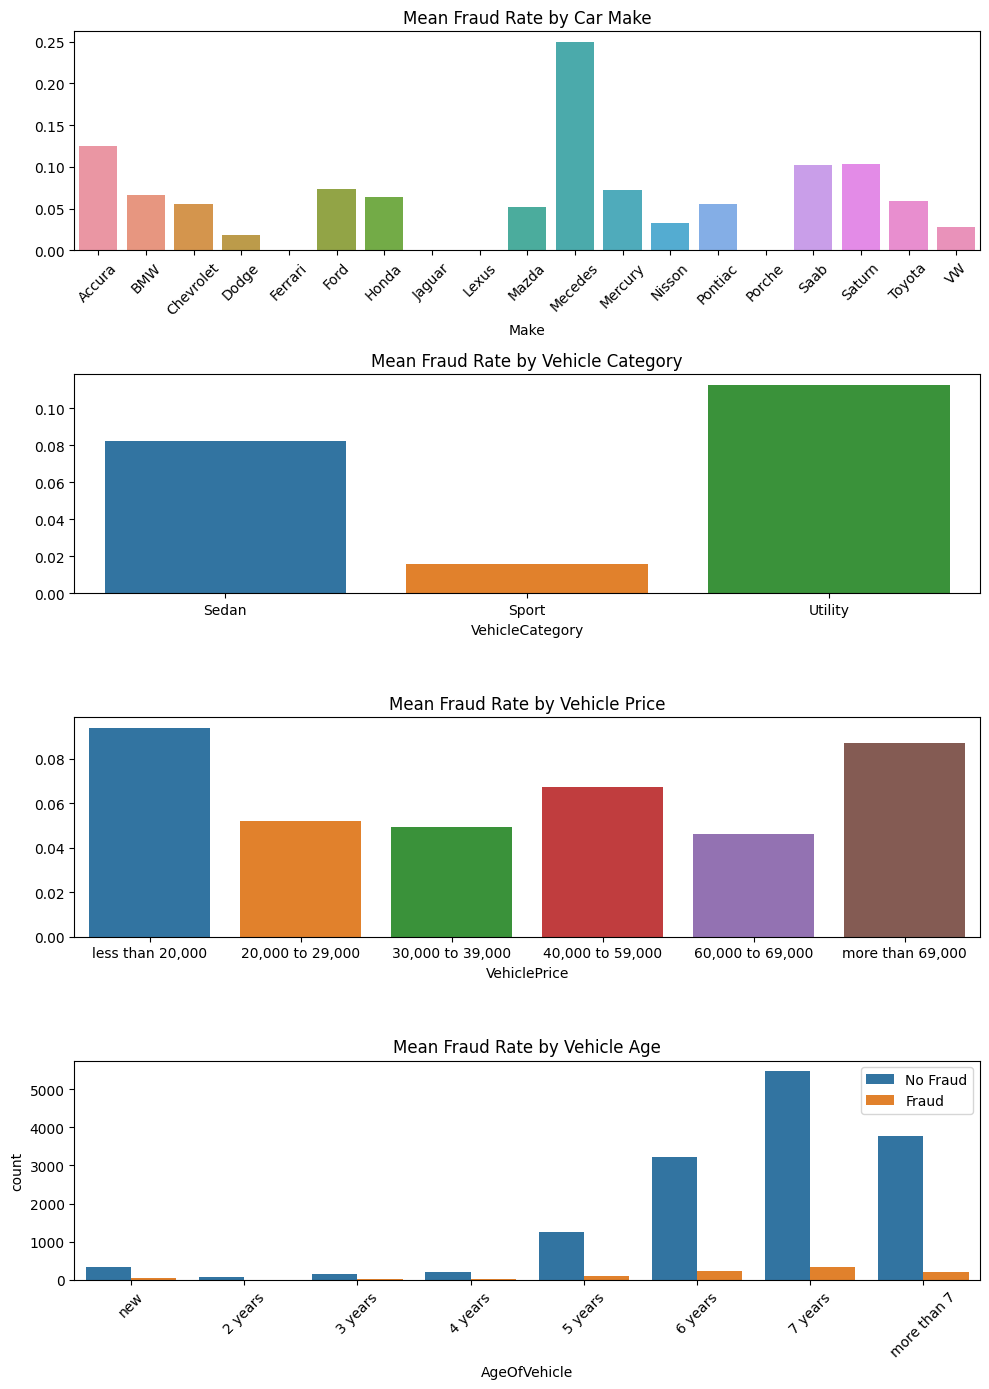

In [42]:
make_fraud = df.groupby('Make')['FraudFound'].mean()
category_fraud = df.groupby('VehicleCategory')['FraudFound'].mean()
price_fraud = df.groupby('VehiclePrice')['FraudFound'].mean()
vehAge_fraud = df.groupby('AgeOfVehicle')['FraudFound'].mean()

fig, ax = plt.subplots(4, 1, figsize=(10,14))
age_order = [ 'new','2 years','3 years', '4 years','5 years' ,'6 years', '7 years', 'more than 7',]
price_order =['less than 20,000', '20,000 to 29,000', '30,000 to 39,000',  '40,000 to 59,000', '60,000 to 69,000','more than 69,000']
sns.barplot(x=make_fraud.index, y=make_fraud.values, ax=ax[0])
sns.barplot(x=category_fraud.index, y=category_fraud.values, ax=ax[1])
sns.barplot(x=price_fraud.index, y=price_fraud.values, ax=ax[2], order = price_order)
sns.countplot(x = 'AgeOfVehicle', hue = "FraudFound", data = df, order=age_order)

ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45)
ax[3].set_xticklabels(ax[3].get_xticklabels(), rotation=45)


ax[0].set_title('Mean Fraud Rate by Car Make')
ax[1].set_title('Mean Fraud Rate by Vehicle Category')
ax[2].set_title('Mean Fraud Rate by Vehicle Price')
ax[3].set_title('Mean Fraud Rate by Vehicle Age')
ax[3].legend(['No Fraud','Fraud'], loc ='upper right')

plt.tight_layout()

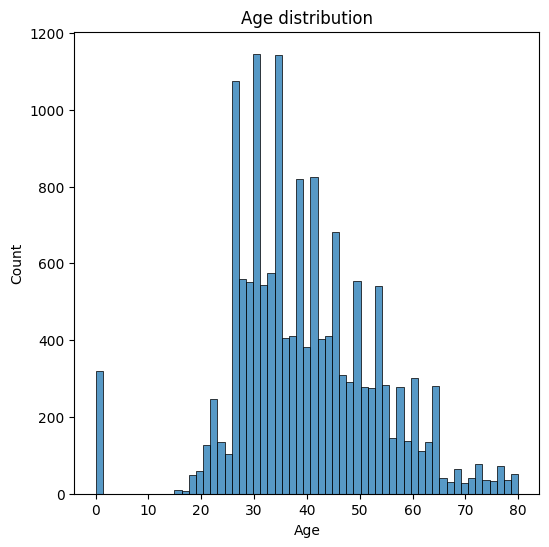

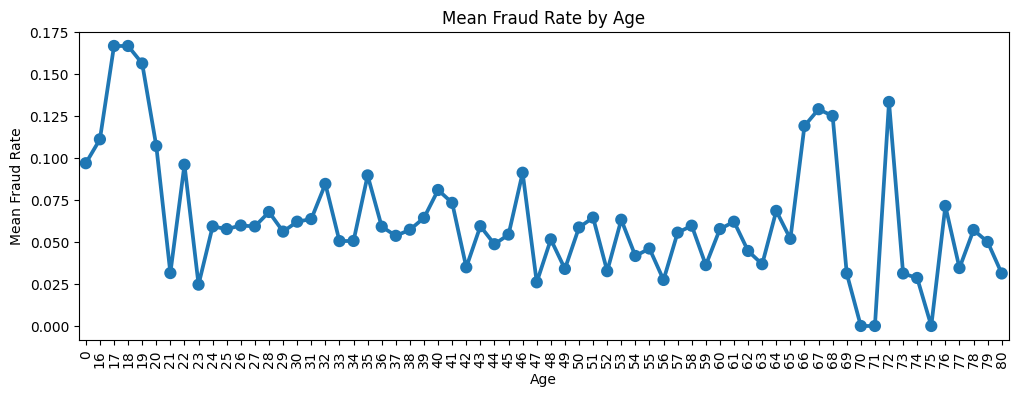

In [43]:
plt.figure(figsize=(6,6))
sns.histplot(df['Age'])
plt.title('Age distribution')
plt.show()

age_fraud = df.groupby('Age')['FraudFound'].mean().reset_index()
plt.figure(figsize=(12, 4))
sns.pointplot(data=age_fraud, x='Age', y='FraudFound')
plt.title('Mean Fraud Rate by Age')

plt.xlabel('Age')
plt.ylabel('Mean Fraud Rate')
plt.xticks(rotation=90)  

plt.show()

### idt age supposed to have 0, 0 means the driver is 16-17 i think? 

Jeff: Yup looks like it based on the age of policy holder column

In [44]:
df.loc[df.Age == 0, "AgeOfPolicyHolder"].value_counts()

16 to 17    320
Name: AgeOfPolicyHolder, dtype: int64

Maybe can just drop this outlier

In [45]:
df[df.MonthClaimed == '0']

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,PolicyNumber,RepNumber,Deductible,DriverRating,Days:Policy-Accident,Days:Policy-Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange-Claim,NumberOfCars,Year,BasePolicy,FraudFound
1516,Jul,2,Monday,Honda,Rural,0,0,1,Male,Single,0,Policy Holder,Sedan - All Perils,Sedan,"more than 69,000",1517,15,400,2,more than 30,none,none,new,16 to 17,No,No,External,none,no change,1 vehicle,1994,All Perils,0


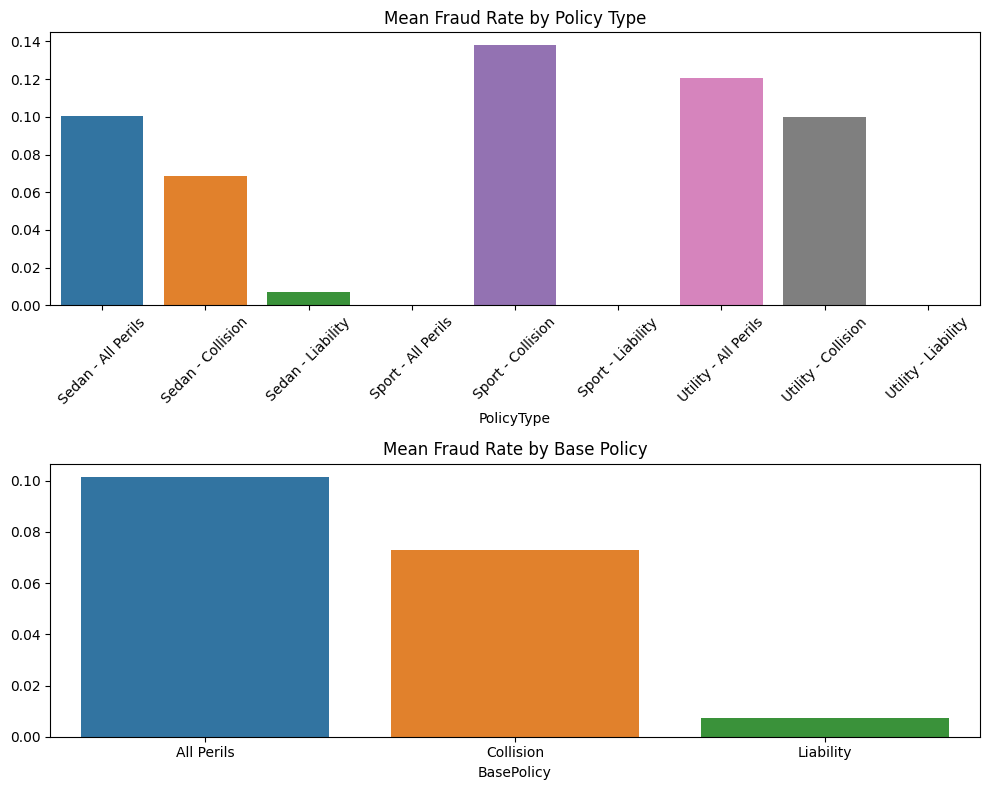

In [46]:
policyType_fraud = df.groupby('PolicyType')['FraudFound'].mean()
basePolicy_fraud = df.groupby('BasePolicy')['FraudFound'].mean()

fig, ax = plt.subplots(2, 1, figsize=(10,8))

sns.barplot(x=policyType_fraud.index, y=policyType_fraud.values, ax=ax[0])
sns.barplot(x=basePolicy_fraud.index, y=basePolicy_fraud.values, ax=ax[1])

ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45)

ax[0].set_title('Mean Fraud Rate by Policy Type')
ax[1].set_title('Mean Fraud Rate by Base Policy')

plt.tight_layout()

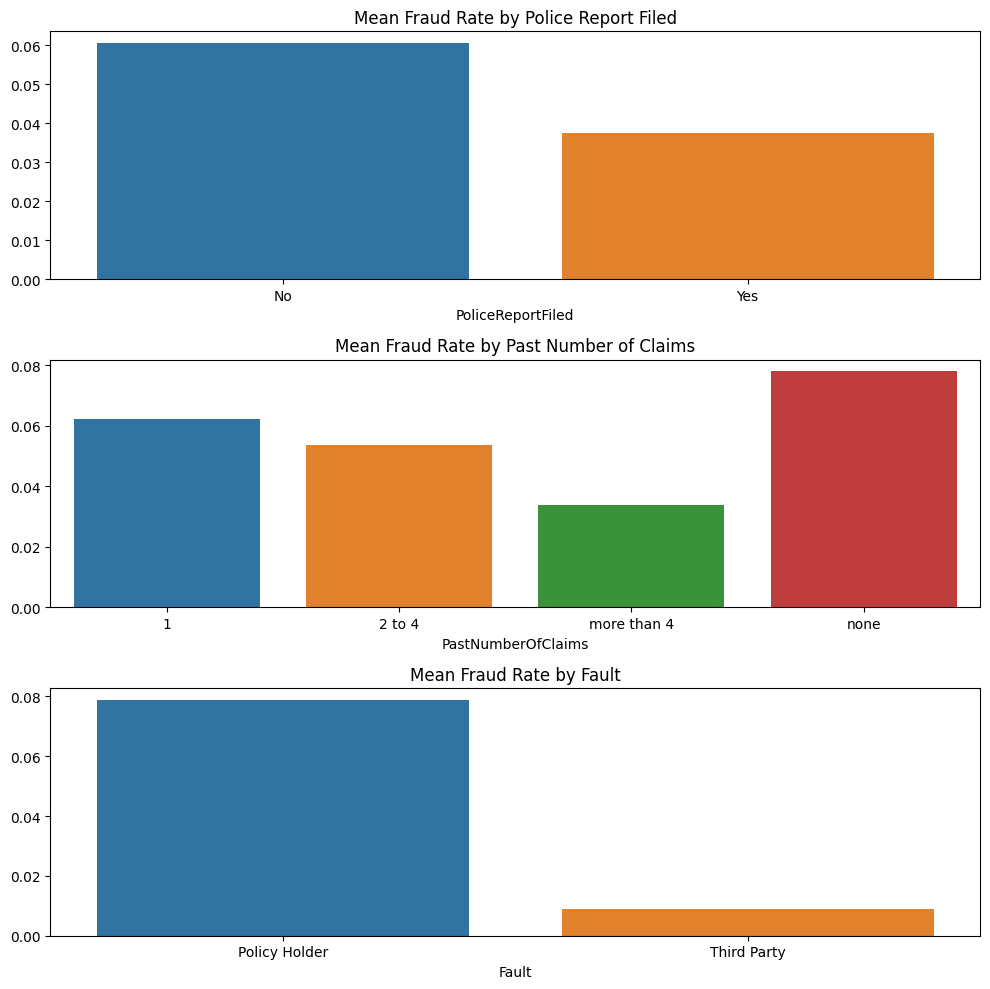

In [47]:
police_fraud = df.groupby('PoliceReportFiled')['FraudFound'].mean()
pastClaims_fraud = df.groupby('PastNumberOfClaims')['FraudFound'].mean()
fault_fraud = df.groupby('Fault')['FraudFound'].mean()

fig, ax = plt.subplots(3, 1, figsize=(10,10))

sns.barplot(x=police_fraud.index, y=police_fraud.values, ax=ax[0])
sns.barplot(x=pastClaims_fraud.index, y=pastClaims_fraud.values, ax=ax[1])
sns.barplot(x=fault_fraud.index, y=fault_fraud.values, ax=ax[2])

ax[0].set_title('Mean Fraud Rate by Police Report Filed')
ax[1].set_title('Mean Fraud Rate by Past Number of Claims')
ax[2].set_title('Mean Fraud Rate by Fault')

plt.tight_layout()

### Correlation Matrix between FraudFound and Categorical Variables (String Datatype)

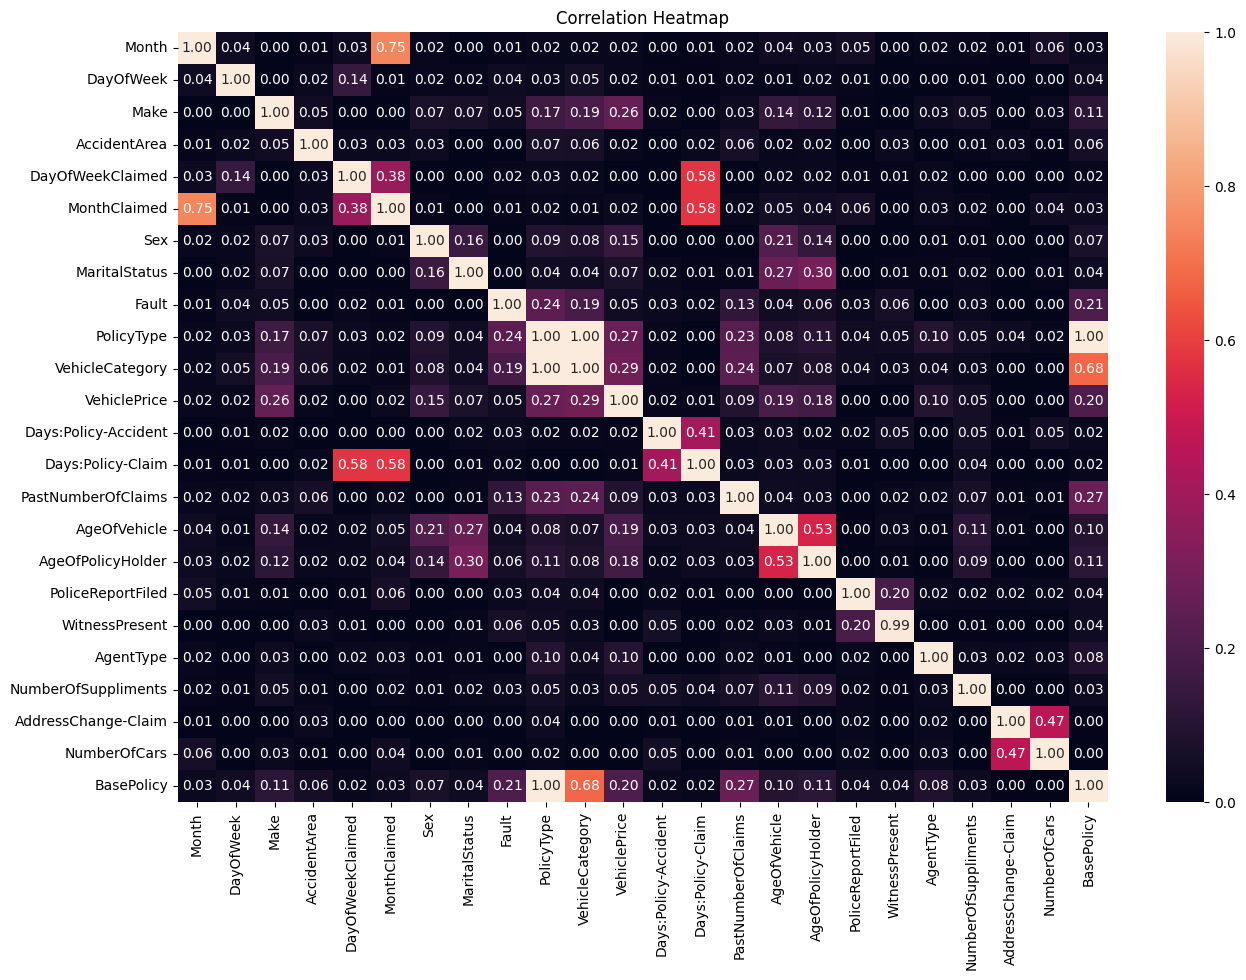

In [48]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

df1 = df.select_dtypes(include="object")
corr_matrix = pd.DataFrame(index=df1.columns, columns=df1.columns)

for i in df1.columns:
    for j in df1.columns:
        corr_matrix.loc[i, j] = cramers_v(df1[i], df1[j])

plt.figure(figsize=(15,10))
sns.heatmap(corr_matrix.astype(float), annot=True,fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()


### Correlation Matrix between FraudFound and Categorical Variables (Numerical Datatype)

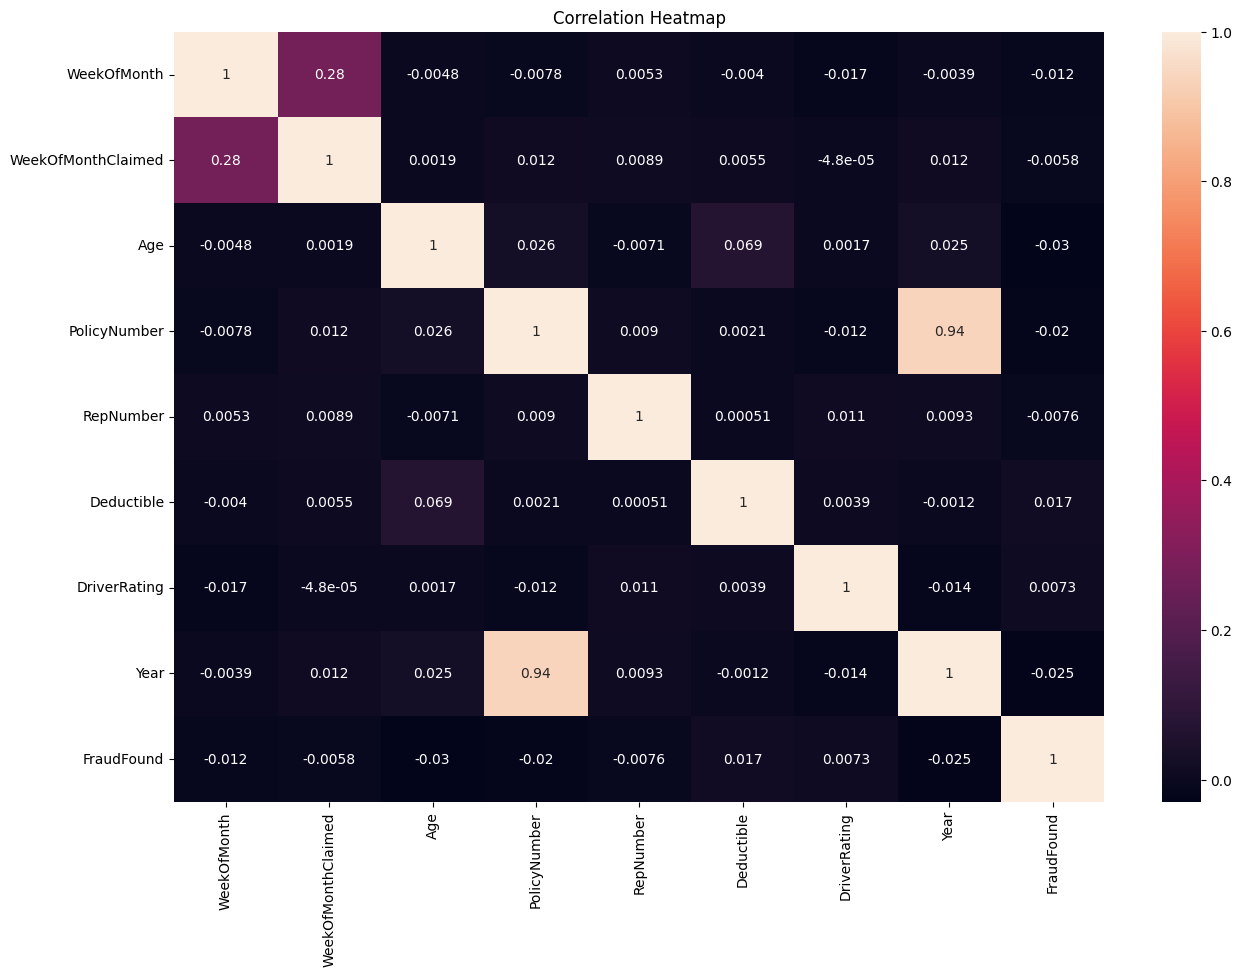

In [49]:
numeric_df = df.select_dtypes(include='number')
plt.figure(figsize=(15,10))
sns.heatmap(numeric_df.corr(), annot=True)
plt.title("Correlation Heatmap")
plt.show()

### Global Data Preprocessing

##### Dropping PolicyNumber as it is irrelevant to fraud detection and dropped PolicyType due to perfect correlation to BasePolicy and VehicleCategory feature.

##### In the EDA section, we also discovered that there are 320 rows where age == 0 which is not possible. However, these rows only appear in rows where AgeOfPolicyHolder == '16 to 17', so we will impute the errorneous data to 16.5

In [50]:
df = df.drop(columns=['PolicyNumber',"PolicyType"])
df['Age'] =df['Age'].replace({0:16.5})

Features which we might need to change encode or just change to numerics

In [51]:
features_to_alter = []

for f in df.columns:
    if df[f].dtype == "object":
        features_to_alter.append(f)
        
print(features_to_alter)
print(len(features_to_alter))

['Month', 'DayOfWeek', 'Make', 'AccidentArea', 'DayOfWeekClaimed', 'MonthClaimed', 'Sex', 'MaritalStatus', 'Fault', 'VehicleCategory', 'VehiclePrice', 'Days:Policy-Accident', 'Days:Policy-Claim', 'PastNumberOfClaims', 'AgeOfVehicle', 'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType', 'NumberOfSuppliments', 'AddressChange-Claim', 'NumberOfCars', 'BasePolicy']
23


### I saw on kaggle theres this dude who encode ordinal and nominal features separately so i just copy and put here first, we can do some other way too.

### Ordinal Encoder on ordinal features

In [52]:
col_ordering = [{'col':'Month','mapping':{'Jan':1,'Feb':2,'Mar':3,'Apr':4,'May':5,'Jun':6,'Jul':7,'Aug':8,'Sep':9,'Oct':10,'Nov':11,'Dec':12}},
    {'col':'DayOfWeek','mapping':{'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6,'Sunday':7}},
    {'col':'DayOfWeekClaimed','mapping':{'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6,'Sunday':7}},
    {'col':'MonthClaimed','mapping':{'Jan':1,'Feb':2,'Mar':3,'Apr':4,'May':5,'Jun':6,'Jul':7,'Aug':8,'Sep':9,'Oct':10,'Nov':11,'Dec':12}},
    {'col':'PastNumberOfClaims','mapping':{'none':0 ,'1':1,'2 to 4':2,'more than 4':5 }},
    {'col':'NumberOfSuppliments','mapping':{'none':0,'1 to 2':1,'3 to 5':3,'more than 5':6}}, 
    {'col':'VehiclePrice','mapping':{'less than 20,000':1,'20,000 to 29,000':2,'30,000 to 39,000':3,
                                     '40,000 to 59,000':4,'60,000 to 69,000':5, 'more than 69,000':6}},
    {'col':'AgeOfVehicle','mapping':{'3 years':3,'6 years':6,'7 years':7,'more than 7':8,'5 years':5,'new':0,'4 years':4,'2 years':2}},
    {'col':'Days:Policy-Accident','mapping':{'more than 30':4,'15 to 30':3,'none':0,'1 to 7':1,'8 to 15':2}},
    {'col':'Days:Policy-Claim','mapping':{'more than 30':4,'15 to 30':3,'none':0,'1 to 7':1,'8 to 15':2}},
    {'col':'AgeOfPolicyHolder','mapping':{'16 to 17':1,'18 to 20':2,'21 to 25':3,'26 to 30':4,'31 to 35':5,'36 to 40':6,
                                          '41 to 50':7,'51 to 65':8,'over 65':9}},
    {'col':'AddressChange-Claim','mapping':{'no change':0,'under 6 months':1,'1 year':2,'2 to 3 years':3,'4 to 8 years':4}},
    {'col':'NumberOfCars','mapping':{'1 vehicle':1,'2 vehicles':2,'3 to 4':3,'5 to 8':4,'more than 8':5}}]

ord_encoder = OrdinalEncoder(mapping = col_ordering, return_df=True)
df2= df.copy()
df2 = ord_encoder.fit_transform(df2)
df2.head(3)

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,VehicleCategory,VehiclePrice,RepNumber,Deductible,DriverRating,Days:Policy-Accident,Days:Policy-Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange-Claim,NumberOfCars,Year,BasePolicy,FraudFound
0,12,5,3,Honda,Urban,2.0,1.0,1,Female,Single,21.0,Policy Holder,Sport,6,12,300,1,4,4,0,3,4,No,No,External,0,2,3,1994,Liability,0
1,1,3,3,Honda,Urban,1.0,1.0,4,Male,Single,34.0,Policy Holder,Sport,6,15,400,4,4,4,0,6,5,Yes,No,External,0,0,1,1994,Collision,0
2,10,5,5,Honda,Urban,4.0,11.0,2,Male,Married,47.0,Policy Holder,Sport,6,7,400,3,4,4,1,7,7,No,No,External,0,0,1,1994,Collision,0


### Encoding Nominal features with one-hot encoder

In [53]:
onehot = OneHotEncoder(cols=['Make', 'MaritalStatus', 'VehicleCategory', 'BasePolicy'], use_cat_names=True, return_df=True) 
df3 = onehot.fit_transform(df2)


#### Convert text values of remaining categorical features to numerical values

In [57]:
df4 = df3.copy()

df4[['PoliceReportFiled', 'WitnessPresent']] = df3[['PoliceReportFiled', 'WitnessPresent']].replace({'No': 0, 'Yes': 1})

df4[['AccidentArea']] = df4[['AccidentArea']].replace( {
    'Rural' : 0,
    'Urban' : 1
    })

df4[['Fault']] = df4[['Fault']].replace( {
    'Third Party' : 0,
    'Policy Holder' : 1
    })

df4[['Sex']] = df4[['Sex']].replace( {
    'Female' : 0,
    'Male' : 1
    })

df4[['AgentType']] = df4[['AgentType']].replace({
    'Internal' : 0,
    'External' : 1
    })
df4.to_csv(r"C:\Users\USER\Downloads\BT4012\asdf.csv", index=False)


### Training and Test Split

In [55]:
X = df4.drop('FraudFound', axis=1)  # Features
y = df4['FraudFound']  # Target variable

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print("Training set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_val.shape, y_val.shape)
print("Test set shape:", X_test.shape, y_test.shape)

Training set shape: (12336, 55) (12336,)
Validation set shape: (1542, 55) (1542,)
Test set shape: (1542, 55) (1542,)


### Feature Engineering

### Local Data Preprocessing(If needed)